## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

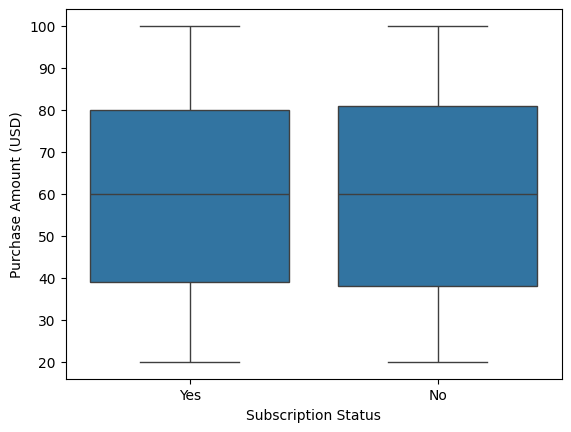

In [ ]:
sns.boxplot(x="Subscription Status", y="Purchase Amount (USD)", data=df)

no outliers found

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

<BarContainer object of 6 artists>

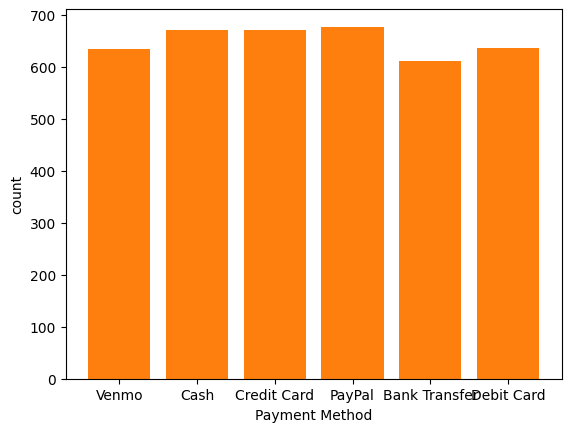

In [ ]:
sns.countplot(x="Payment Method", data=df)


<BarContainer object of 6 artists>

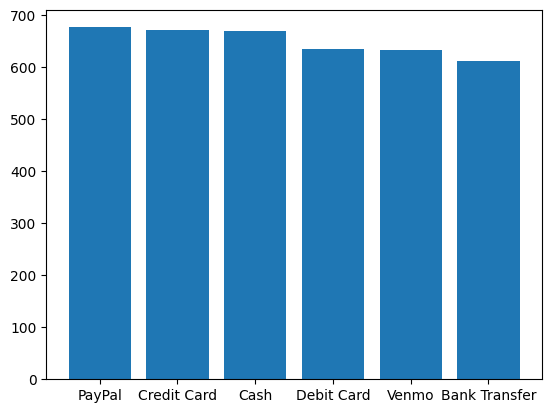

In [ ]:
plt.bar(df["Payment Method"].value_counts().index, df["Payment Method"].value_counts().values)

All the methods are close in number,paypal is the highest

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

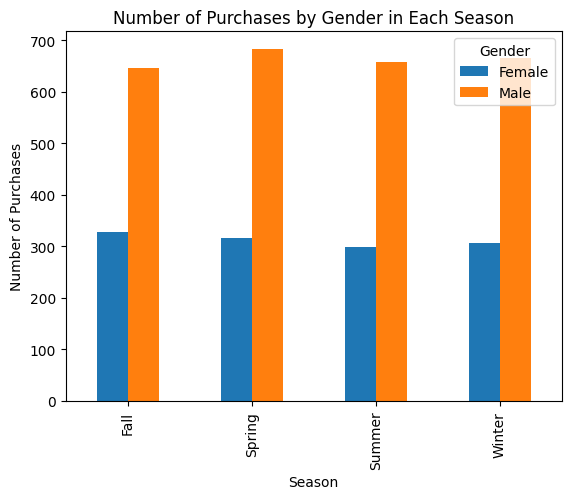

In [ ]:
counts = df.groupby(['Season', 'Gender']).size().unstack()
counts.plot(kind='bar')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Gender in Each Season')
plt.show()

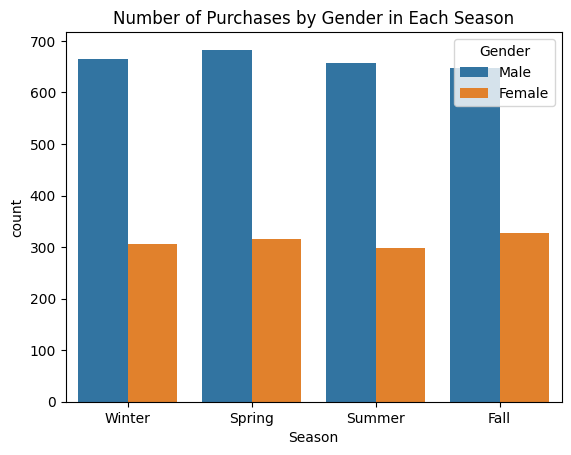

In [ ]:

sns.countplot(data=df, x='Season', hue='Gender')
plt.title('Number of Purchases by Gender in Each Season')
plt.show()


### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

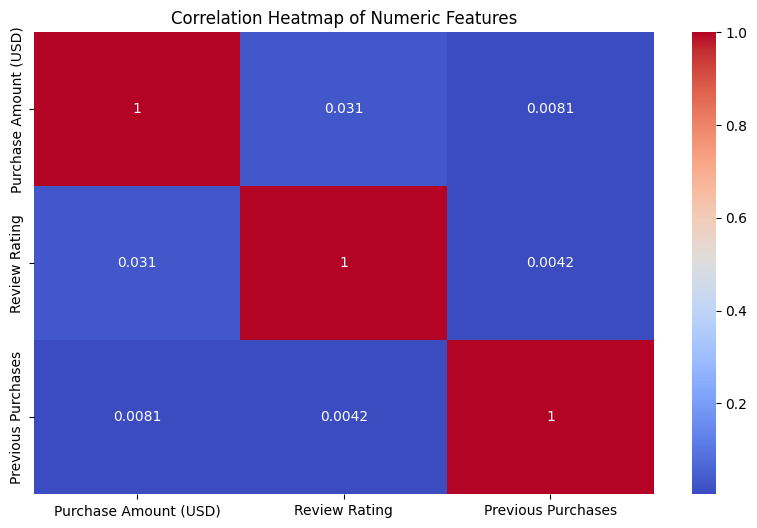

In [ ]:

numeric_df = df.select_dtypes(include='number')
numeric_df1 = numeric_df.drop(columns=['Customer ID','Age'], errors='ignore')
corr = numeric_df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
)

plt.title('Correlation Heatmap of Numeric Features')
plt.show()

All correlations are very weak and close to zero.

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

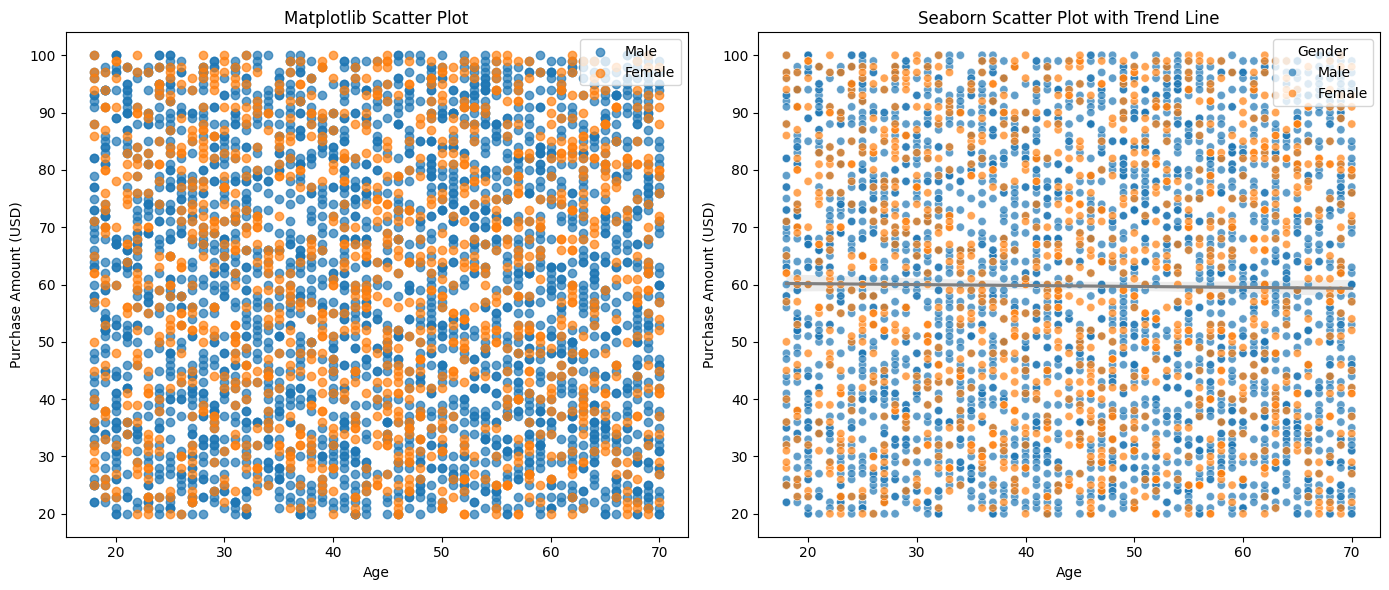

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Age'], subset["Purchase Amount (USD)"], label=gender, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Matplotlib Scatter Plot')
plt.legend()
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='Age', y='Purchase Amount (USD)', scatter=False, color='gray')
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)', hue='Gender', alpha=0.7)
plt.title('Seaborn Scatter Plot with Trend Line')
plt.tight_layout()
plt.show()

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

Text(0.5, 1.0, 'Average Review Rating by Category and Size')

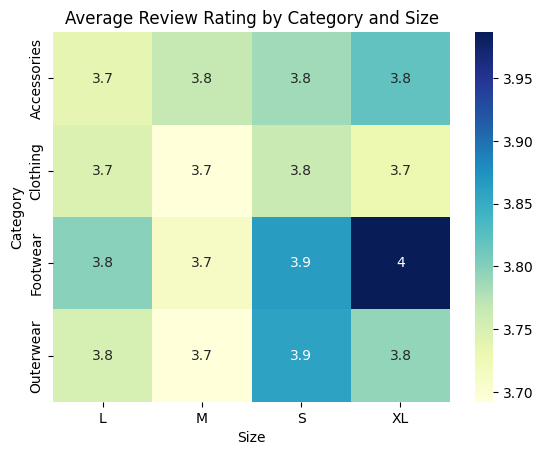

In [ ]:
pivot = df.pivot_table(
    index='Category',
    columns='Size',
    values='Review Rating',
    aggfunc='mean'
)
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title('Average Review Rating by Category and Size')

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

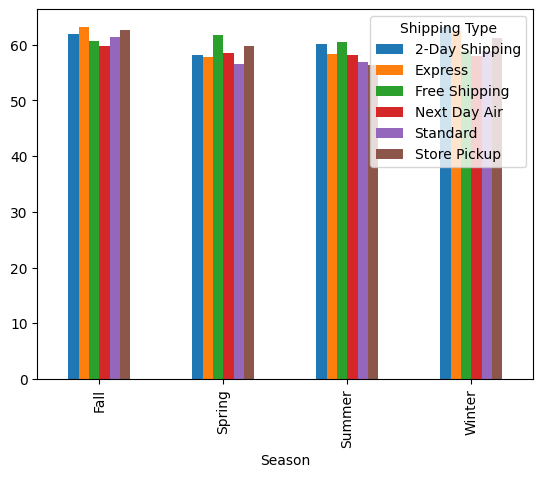

In [ ]:
df.groupby(['Season','Shipping Type'])['Purchase Amount (USD)'].mean().unstack().plot(kind='bar'); plt.show()

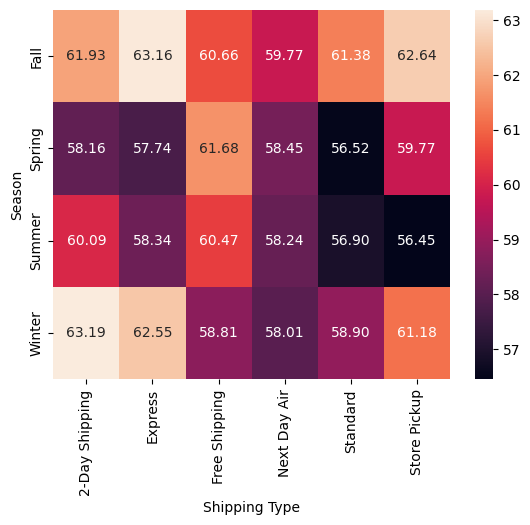

In [ ]:
sns.heatmap(df.groupby(['Season','Shipping Type'])['Purchase Amount (USD)'].mean().unstack(), annot=True, fmt=".2f"); plt.show()

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

<Axes: xlabel='Subscription Status', ylabel='Review Rating'>

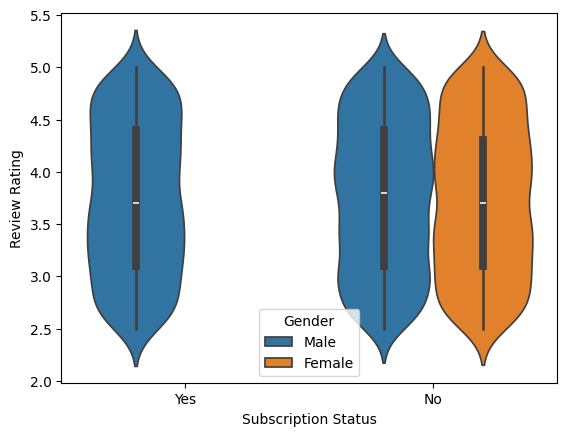

In [ ]:
sns.violinplot(x='Subscription Status', y='Review Rating', hue='Gender', data=df)

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

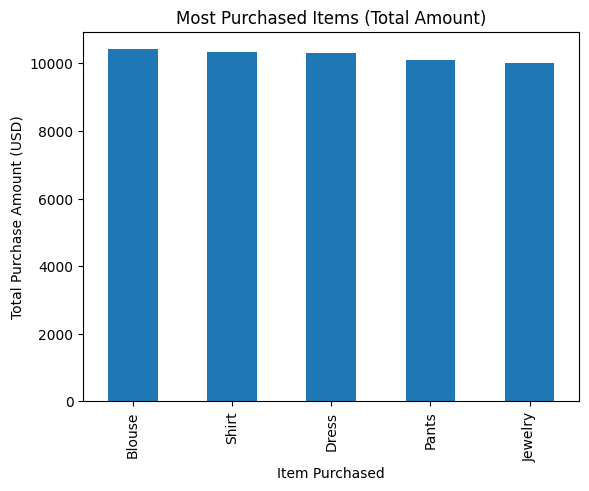

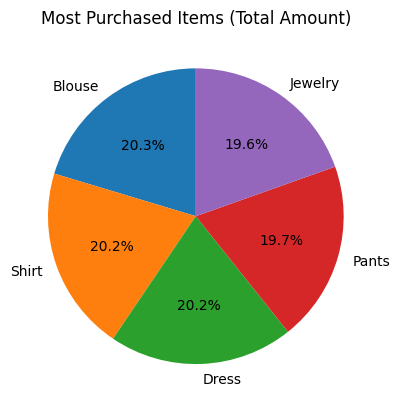

In [ ]:
top5 = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5)

top5.plot(kind='bar')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Most Purchased Items (Total Amount)')
plt.show()
top5.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Most Purchased Items (Total Amount)')
plt.show()

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

<Axes: xlabel='Previous Purchases', ylabel='Purchase Amount (USD)'>

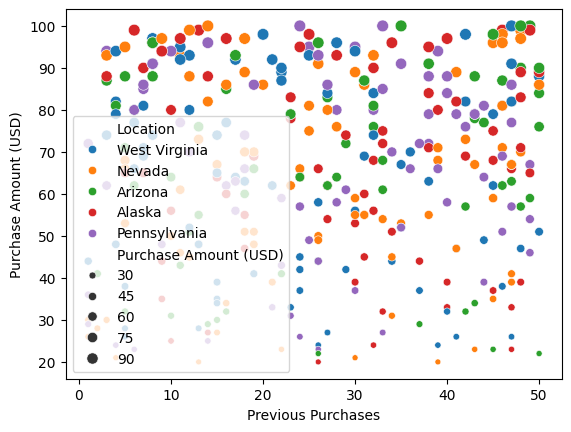

In [ ]:
top_locations = df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False).head(5).index

df_top = df[df['Location'].isin(top_locations)]
sns.scatterplot(
    data=df_top,
    x='Previous Purchases',
    y='Purchase Amount (USD)',
    hue='Location',
    size='Purchase Amount (USD)',
)

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

<Axes: xlabel='Size', ylabel='Gender'>

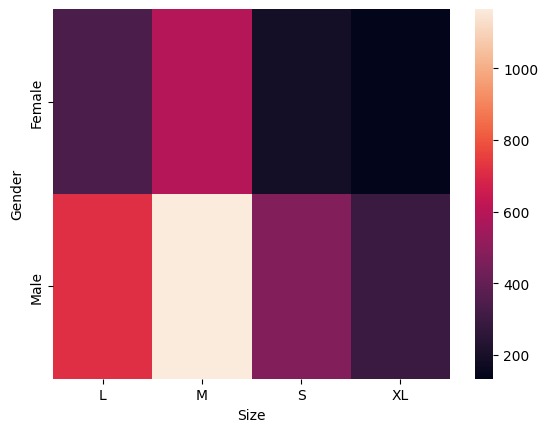

In [ ]:
sns.heatmap(pd.crosstab(df['Gender'], df['Size']))

M size is the most popular for both genders,XL size is the least common for females.



### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

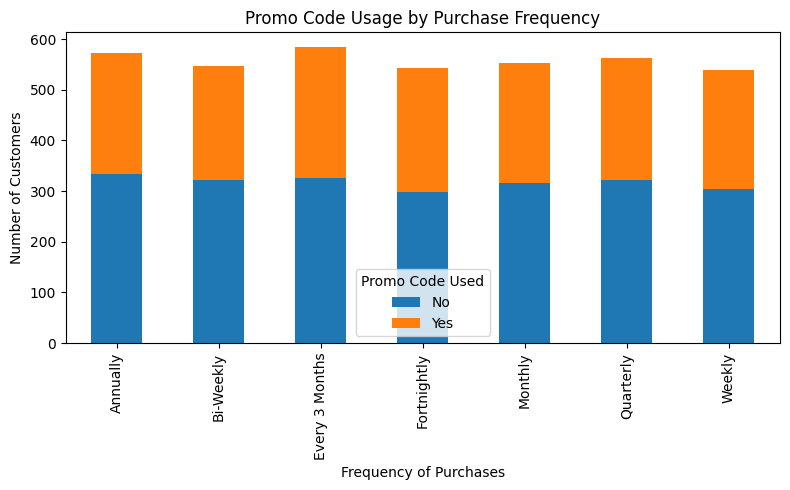

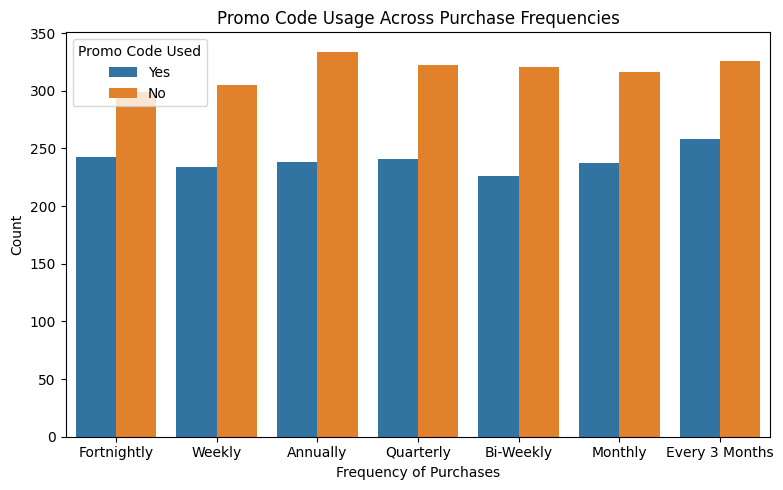

In [6]:

freq_promo = pd.crosstab(
    df['Frequency of Purchases'],
    df['Promo Code Used']
)
freq_promo.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

plt.title('Promo Code Usage by Purchase Frequency')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Number of Customers')
plt.legend(title='Promo Code Used')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='Frequency of Purchases',
    hue='Promo Code Used'
)

plt.title('Promo Code Usage Across Purchase Frequencies')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The stacked bar chart shows proportions, while the countplot shows actual numbers

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

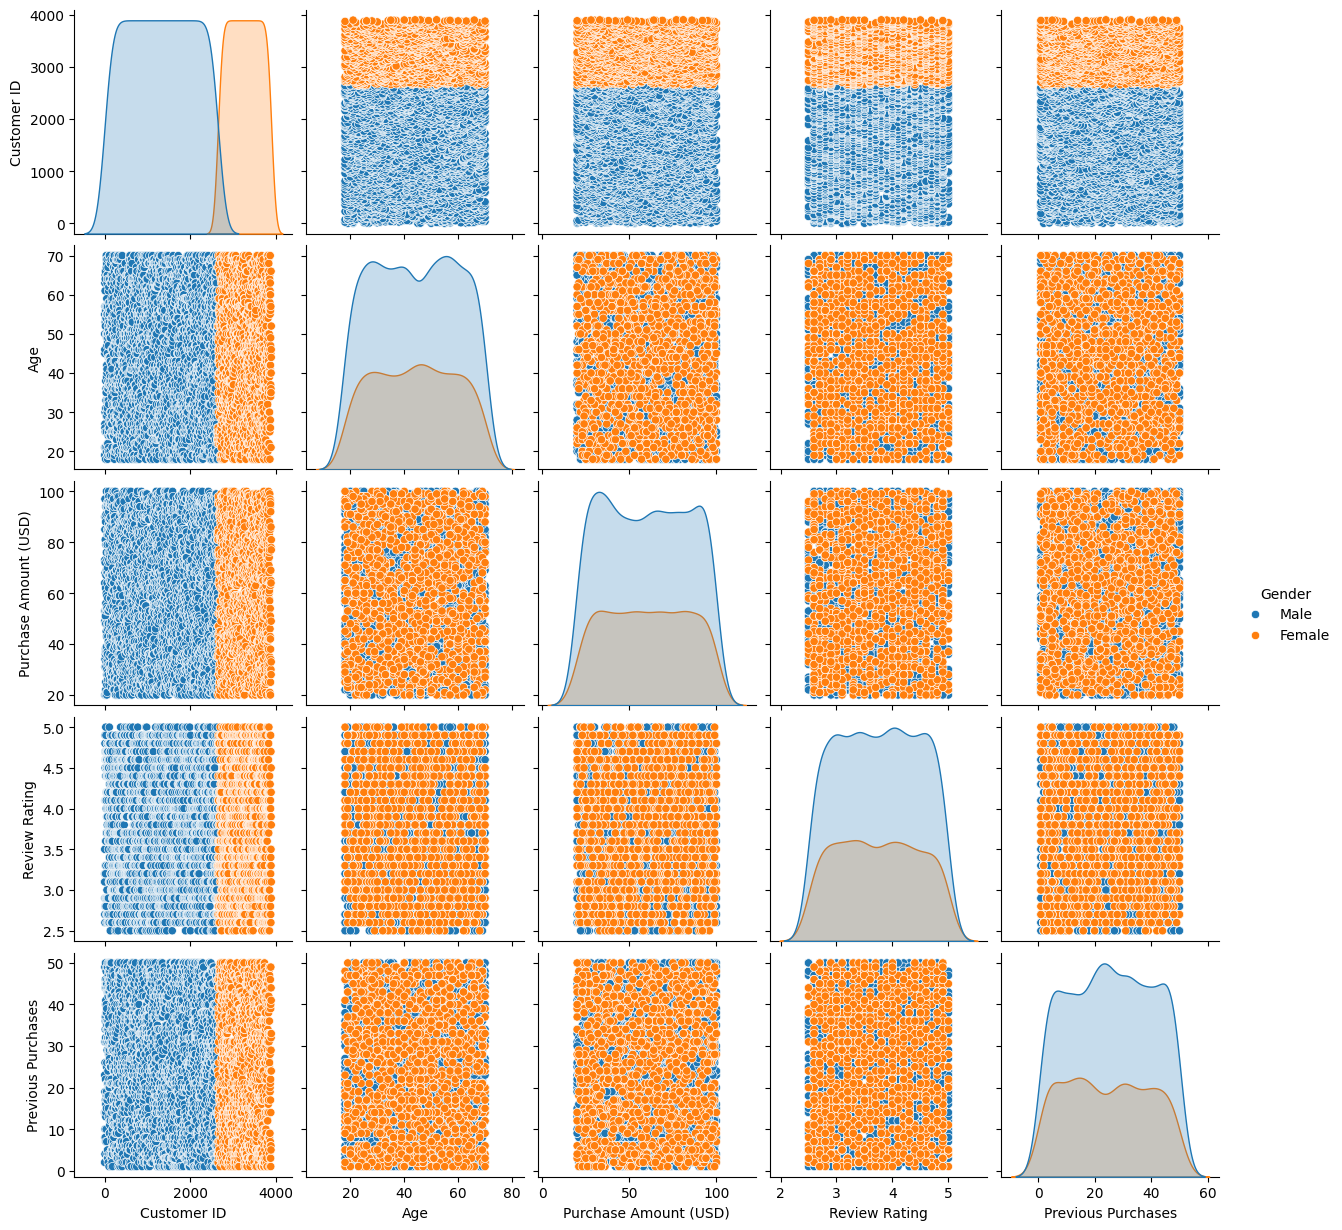

In [ ]:
sns.pairplot(df, hue="Gender")